In [18]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

In [19]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
# Print first 5 rows
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Data is in form label,pixels

In [21]:
# Check missing values
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

No missing data in both training and testing sets

In [22]:
# Seperate x and y values for training set
# Cast the values inside of the data frame as approrpiate data type
y = train.label.values.astype('int32')
x = train.drop(columns=['label']).values.astype('float32')
print('training set shape: {}'.format(x.shape))
print('training labels shape: {}'.format(y.shape))

training set shape: (42000, 784)
training labels shape: (42000,)


In [23]:
# Create a set of normalized data
scale = np.max(x)
x_norm = x/scale
test_norm = test/scale

Text(0.5, 0, 'Digit')

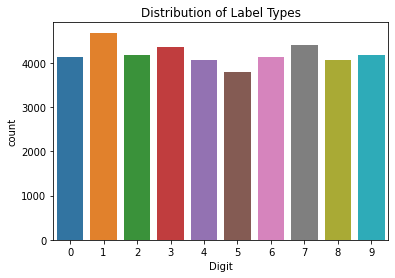

In [24]:
# See the distribution of label types
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title('Distribution of Label Types')
plt.xlabel('Digit')

Relatively even distribution of digits with the training set having having about 4000 samples per digit

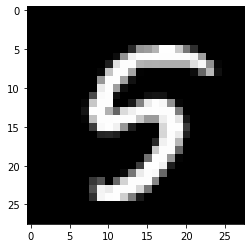

In [25]:
# Print a random image 
import matplotlib.pyplot as plt
# Reshape to a 2-d array with 1 colour channel
image = x[8].reshape(28,28,1)
plt.imshow(image, cmap='gray')

Digits are in black and white. Some are recognizable and some are not so distinct.

In [26]:
# Perform categorical encoding on the training labels
num_categories = 10
y = keras.utils.to_categorical(y, num_categories)

In [27]:
# Split the non-normalized data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,random_state=69)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(31500, 784) (31500, 10)
(10500, 784) (10500, 10)


In [28]:
# Create a function to generate predictions in a csv file
def get_preds(model, test_data, filepath):
    '''
    This function take a model, a set of test data, and a file name.
    The model creates predictions based on the test data.
    Then the predictions are placed into a csv file acceptable for submission.
    '''
    # Make prediction and take the max value of each row
    preds = np.argmax(model.predict(test_data),axis=1) # set axis to 1 to analyze each row
    submission = pd.DataFrame({'ImageId':list(range(1,len(test_data)+1)),'Label':preds})
    submission.to_csv(filepath,index=False,header=True)

In [29]:
# Create a basic deep learning model
def base_mlp():
    # Initiate the model
    base_model = Sequential()
    # Add layers
    base_model.add(Dense(512,activation='relu', input_shape=(784,))) # Input layer
    base_model.add(Dense(512, activation= 'relu')) # Hidden layer
    base_model.add(Dense(10, activation= 'sigmoid')) # 10 output nodes corresponding to 10 labels
    # Return the model with all layers
    return base_model

In [30]:
base_model = base_mlp()
base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
base_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
# Fit the model
base_hist = base_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 5s 5ms/step - loss: 2.3732 - accuracy: 0.8838 - val_loss: 0.6469 - val_accuracy: 0.9107
Epoch 2/10
985/985 [==============================] - 4s 4ms/step - loss: 0.2979 - accuracy: 0.9399 - val_loss: 0.2581 - val_accuracy: 0.9410
Epoch 3/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1959 - accuracy: 0.9547 - val_loss: 0.2814 - val_accuracy: 0.9444
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1955 - accuracy: 0.9528 - val_loss: 0.3334 - val_accuracy: 0.9241
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1712 - accuracy: 0.9573 - val_loss: 0.2629 - val_accuracy: 0.9474
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1683 - accuracy: 0.9597 - val_loss: 0.2535 - val_accuracy: 0.9510
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.1546 - accuracy: 0.9623 - val_loss: 0.2293 - val_accuracy: 0.9455
Epoch 

In [33]:
# Print the metrics    
loss,accuracy = base_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = base_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9660
Training Accuracy: 0.9499


In [34]:
# Clear session
from keras.backend import clear_session
clear_session()

In [35]:
# Create a model with dropout layers
def drop_mlp():
    drop_model = Sequential()
    drop_model.add(Dense(512,activation='relu', input_shape=(784,))) # Input layer
    drop_model.add(Dropout(0.15)) # Ignore a random 20% of neurons in each step
    drop_model.add(Dense(512, activation= 'relu')) # Hidden layer
    drop_model.add(Dropout(0.2))
    drop_model.add(Dense(10, activation= 'sigmoid')) # 10 output nodes corresponding to 10 labels
    return drop_model

In [36]:
drop_model = drop_mlp()
drop_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile and fit the model
drop_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
drop_hist = drop_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 5s 5ms/step - loss: 3.1275 - accuracy: 0.8523 - val_loss: 0.3191 - val_accuracy: 0.9273
Epoch 2/10
985/985 [==============================] - 5s 5ms/step - loss: 0.4023 - accuracy: 0.9084 - val_loss: 0.1964 - val_accuracy: 0.9456
Epoch 3/10
985/985 [==============================] - 5s 5ms/step - loss: 0.2954 - accuracy: 0.9237 - val_loss: 0.2240 - val_accuracy: 0.9453
Epoch 4/10
985/985 [==============================] - 5s 5ms/step - loss: 0.2718 - accuracy: 0.9287 - val_loss: 0.2091 - val_accuracy: 0.9433
Epoch 5/10
985/985 [==============================] - 4s 5ms/step - loss: 0.2708 - accuracy: 0.9311 - val_loss: 0.1950 - val_accuracy: 0.9499
Epoch 6/10
985/985 [==============================] - 4s 5ms/step - loss: 0.2509 - accuracy: 0.9353 - val_loss: 0.1898 - val_accuracy: 0.9514
Epoch 7/10
985/985 [==============================] - 5s 5ms/step - loss: 0.2420 - accuracy: 0.9388 - val_loss: 0.2294 - val_accuracy: 0.9424
Epoch 

In [38]:
# Print the metrics    
loss,accuracy = drop_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = drop_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9665
Training Accuracy: 0.9551


The dropout model had about 1% less performance than the base MLP model

In [39]:
# Split the normalized data
x_train, x_val, y_train, y_val = train_test_split(x_norm,y,random_state=69)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(31500, 784) (31500, 10)
(10500, 784) (10500, 10)


In [40]:
# Create a model using the normalized data
norm_base_model = base_mlp()
norm_base_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile and fit the model
norm_base_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
norm_base_hist = norm_base_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 5s 4ms/step - loss: 0.2380 - accuracy: 0.9275 - val_loss: 0.1377 - val_accuracy: 0.9539
Epoch 2/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0967 - accuracy: 0.9696 - val_loss: 0.1360 - val_accuracy: 0.9577
Epoch 3/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0649 - accuracy: 0.9797 - val_loss: 0.1383 - val_accuracy: 0.9603
Epoch 4/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0446 - accuracy: 0.9847 - val_loss: 0.1128 - val_accuracy: 0.9689
Epoch 5/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0391 - accuracy: 0.9872 - val_loss: 0.1243 - val_accuracy: 0.9685
Epoch 6/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.1287 - val_accuracy: 0.9711
Epoch 7/10
985/985 [==============================] - 4s 4ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.1244 - val_accuracy: 0.9724
Epoch 

In [42]:
# Print the metrics    
loss,accuracy = norm_base_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = norm_base_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9950
Training Accuracy: 0.9737


In [43]:
clear_session()

In [44]:
norm_drop_model = drop_mlp()
norm_drop_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile and fit the model
norm_drop_model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
norm_drop_hist = norm_drop_model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))

Epoch 1/10
985/985 [==============================] - 5s 5ms/step - loss: 0.2633 - accuracy: 0.9203 - val_loss: 0.1286 - val_accuracy: 0.9601
Epoch 2/10
985/985 [==============================] - 5s 5ms/step - loss: 0.1165 - accuracy: 0.9632 - val_loss: 0.1437 - val_accuracy: 0.9556
Epoch 3/10
985/985 [==============================] - 5s 5ms/step - loss: 0.0843 - accuracy: 0.9734 - val_loss: 0.1163 - val_accuracy: 0.9652
Epoch 4/10
985/985 [==============================] - 5s 5ms/step - loss: 0.0664 - accuracy: 0.9791 - val_loss: 0.1038 - val_accuracy: 0.9714
Epoch 5/10
985/985 [==============================] - 5s 5ms/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 0.0892 - val_accuracy: 0.9750
Epoch 6/10
985/985 [==============================] - 5s 5ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.0990 - val_accuracy: 0.9739
Epoch 7/10
985/985 [==============================] - 5s 5ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.1003 - val_accuracy: 0.9740
Epoch 

In [46]:
# Print the metrics    
loss,accuracy = norm_drop_model.evaluate(x_train,y_train,verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss,accuracy = norm_drop_model.evaluate(x_val, y_val, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9942
Training Accuracy: 0.9769


When the data is normalized, the model with a dropout layer performs marginally better than the base model. Regardless, normalizing the data increases performance by 1-2%

In [47]:
# Save the best models
get_preds(base_model,test,'submissions//digits_base_mlp.csv')
get_preds(norm_drop_model,test_norm,'submissions//digits_norm_drop_mlp.csv')

In [48]:
clear_session()